<a href="https://colab.research.google.com/github/cristianmunoz1/ai4eng-proyecto/blob/main/06%20-%20modelo%20con%20preprocesado%20sin%20departamento%20y%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regresión logística con el preprocesado 1 que se realizó

## Librerías

Importamos las librerías necesarias para trabajar con datos y vectores.

*   Pandas: Para trabajar con Dataframes.
*   Numpy: Para trabajar con vectores ya sea numéricos o categóricos.
*   train_test_split: Para obtener la partición de los datos de train y de test.
*   linear_model: Para realizar predicciones de datos con un modelo de regresión logística.
*   matplotlib: Para realizar una gráfica de las primeras predicciones y visualizar su comportamiento.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

## Carga de archivos

Cargamos los archivos train1.csv y test1.csv los cuales contienen los datos preprocesados de la primera forma que implementamos y las guardamos en 2 variables que almacenan Dataframes de pandas con los datos de los csv

In [ ]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

Verificamos los primeros 5 datos de train

In [ ]:
train.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,"('administracion de empresas',)","('administracion en salud ocupacional',)","('administracion financiera',)","('arquitectura',)",...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,7.0,2.0,4.0,8.0,12.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,5.0,1.0,4.0,9.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2,5.0,5.0,4.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,6.0,1.0,5.0,2.0,7.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
4,5.0,4.0,4.0,5.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1


Verificamos los primeros 5 datos de test

In [ ]:
test.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,"('administracion de empresas',)","('administracion en salud ocupacional',)","('administracion financiera',)","('arquitectura',)",...,"('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_no info,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,550236,2.0,2.0,4.0,9.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1
1,98545,5.0,4.0,3.0,7.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
2,499179,4.0,1.0,4.0,6.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
3,782980,4.0,4.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,785185,5.0,3.0,3.0,7.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1


Observamos las columnas de train

In [ ]:
train.columns

Index(['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'RENDIMIENTO_GLOBAL', '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'FAMI_TIENEINTERNET_No',
       'FAMI_TIENEINTERNET_Si'],
      dtype='object')

Observamos las columnas de test

In [ ]:
test.columns

Index(['ID', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'ESTU_PAGOMATRICULAPROPIO_no info',
       'FAMI_TIENEINTERNET_No', 'FAMI_TIENEINTERNET_Si'],
      dtype='object')

## Obtención de los datos de Train

Al dataset que queremos enviar como entrenamiento (Valores x) le quitamos la columna rendimiento global que será nuestra variable predicción $y$


In [ ]:
X = train.drop('RENDIMIENTO_GLOBAL', axis = 1)

Por lo tanto, X queda con la siguiente forma

In [ ]:
X.shape

(686002, 30)

A nuestra variable $y$ le llevamos entonces los datos de train pero solamente la columna 'RENDIMIENTO_GLOBAL' que es nuestra variable predicción

In [ ]:
y = train['RENDIMIENTO_GLOBAL'].values

Verificamos los valores únicos de X

In [ ]:
np.unique(X)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

Verificamos los valores únicos de $y$ y podemos observar que hay solo 4 datos, del 1 al 4. Estos datos son correctos ya que son 4 categorías diferentes las que queremos predecir.

In [ ]:
np.unique(y)

array([1., 2., 3., 4.])

## Obtención de los datos de Test

A las $X$ de test, les vamos a quitar 2 columnas.
*   ID: Porque el ID contiene solo etiquetas, y no queremos que estos datos se relaciones con dichas etiquetas.
*   ESTU_PAGOMATRICULAPROPIO_noinfo ya que estos datos en los cuales no hay información aportan ruido al modelo.

In [ ]:
Xtest = test.drop(['ID', 'ESTU_PAGOMATRICULAPROPIO_no info'], axis = 1)

Por lo tanto, $X_{test}$ va a tener la siguiente forma:

In [ ]:
Xtest.shape

(296786, 30)

Y los siguientes valores únicos:

In [ ]:
np.unique(Xtest)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

Decidimos que el test_size, o el tamaño de datos de test sería el 30% del dataset y utilizamos el train_test_split para obtener los respectivos datos particionados.

In [ ]:
test_size = 0.3

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(480201, 30) (205801, 30)


## Instanciación del modelo de regresión lineal

Instanciamos en una variable estimator un objeto de tipo LinearRegression que agrupa todos los métodos y atributos necesarios para aplicar un modelo de Regresión logística a nuestros datos.

In [ ]:
estimator = linear_model.LinearRegression()

## Entrenamiento del modelo

In [ ]:
estimator.fit(Xtr, ytr)

LinearRegression()

## Métricas de desempeño

In [ ]:
estimator.score(Xtr, ytr), estimator.score(Xts,yts)


(0.16626609693483818, 0.16845573372174427)

Con el modelo ahora entrenado, vamos a hacer las predicciones correspondientes con los datos Test

In [ ]:
predicciones = estimator.predict(Xtest)

Debemos redondear las predicciones ya que nos deben dar entero, dado que solo tenemos 4 categorias: 1, 2, 3, 4

In [ ]:
predicciones = np.round(predicciones)

Verificamos el formato de las 10 primeras predicciones de nuestro modelo.

In [ ]:
predicciones[:10]

array([2., 3., 3., 2., 2., 2., 3., 4., 2., 3.])

## Gráfica
Graficamos el comportamiento de las primeras 9 predicciones.

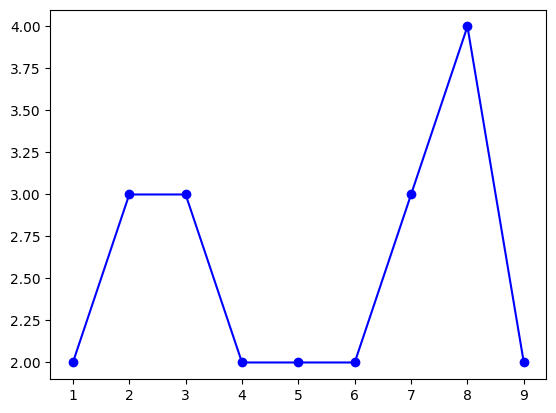

In [ ]:
plt.plot(range(1, 10), predicciones[:9], 'b-o')